In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_inceptionV3(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.applications.inception_v3.InceptionV3(
                weights="imagenet", include_top=False, input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(
                preprocessing_utils.num_classes, kernel_regularizer=keras.regularizers.l2(0.01), activation="softmax"
            ),
        ],
    )

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
inceptionV3_wrapper = ModelWrapper("InceptionV3", preprocessing_utils=preprocessing_utils)

In [8]:
inceptionV3_wrapper.build_model(build_fn=build_inceptionV3, model_name=inceptionV3_wrapper.model_name)

Building model...
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 22,068,281
Trainable params: 22,033,849
Non-trainable params: 34,432
____________________

In [9]:
inceptionV3_wrapper.train_and_save_model_and_history(batch_size=32)

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 3.6318 - accuracy: 0.0669
Epoch 1: val_loss improved from inf to 3.46902, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 46s 301ms/step - loss: 3.6318 - accuracy: 0.0669 - val_loss: 3.4690 - val_accuracy: 0.1198 - lr: 1.0000e-04
Epoch 2/100
129/129 [==============================] - ETA: 0s - loss: 3.4318 - accuracy: 0.1428
Epoch 2: val_loss improved from 3.46902 to 3.34970, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 298ms/step - loss: 3.4318 - accuracy: 0.1428 - val_loss: 3.3497 - val_accuracy: 0.1935 - lr: 1.0000e-04
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 3.2604 - accuracy: 0.2009
Epoch 3: val_loss improved from 3.34970 to 3.22524, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 295ms/step - loss: 3.2604 - accuracy: 0.2009 - val_loss: 3.2252 - val_accuracy: 0.2212 - lr: 1.0000e-04
Epoch 4/100
129/129 [==============================] - ETA: 0s - loss: 3.0843 - accuracy: 0.2685
Epoch 4: val_loss improved from 3.22524 to 3.08854, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 39s 299ms/step - loss: 3.0843 - accuracy: 0.2685 - val_loss: 3.0885 - val_accuracy: 0.2581 - lr: 1.0000e-04
Epoch 5/100
129/129 [==============================] - ETA: 0s - loss: 2.9008 - accuracy: 0.3184
Epoch 5: val_loss improved from 3.08854 to 2.93158, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 2.9008 - accuracy: 0.3184 - val_loss: 2.9316 - val_accuracy: 0.3041 - lr: 1.0000e-04
Epoch 6/100
129/129 [==============================] - ETA: 0s - loss: 2.7213 - accuracy: 0.3697
Epoch 6: val_loss improved from 2.93158 to 2.78102, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 2.7213 - accuracy: 0.3697 - val_loss: 2.7810 - val_accuracy: 0.3364 - lr: 1.0000e-04
Epoch 7/100
129/129 [==============================] - ETA: 0s - loss: 2.5565 - accuracy: 0.4172
Epoch 7: val_loss improved from 2.78102 to 2.63733, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 2.5565 - accuracy: 0.4172 - val_loss: 2.6373 - val_accuracy: 0.3779 - lr: 1.0000e-04
Epoch 8/100
129/129 [==============================] - ETA: 0s - loss: 2.4052 - accuracy: 0.4634
Epoch 8: val_loss improved from 2.63733 to 2.52215, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 291ms/step - loss: 2.4052 - accuracy: 0.4634 - val_loss: 2.5221 - val_accuracy: 0.4101 - lr: 1.0000e-04
Epoch 9/100
129/129 [==============================] - ETA: 0s - loss: 2.2463 - accuracy: 0.5198
Epoch 9: val_loss improved from 2.52215 to 2.39413, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 2.2463 - accuracy: 0.5198 - val_loss: 2.3941 - val_accuracy: 0.4700 - lr: 1.0000e-04
Epoch 10/100
129/129 [==============================] - ETA: 0s - loss: 2.1070 - accuracy: 0.5532
Epoch 10: val_loss improved from 2.39413 to 2.28327, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 2.1070 - accuracy: 0.5532 - val_loss: 2.2833 - val_accuracy: 0.5207 - lr: 1.0000e-04
Epoch 11/100
129/129 [==============================] - ETA: 0s - loss: 1.9772 - accuracy: 0.6045
Epoch 11: val_loss improved from 2.28327 to 2.18383, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 282ms/step - loss: 1.9772 - accuracy: 0.6045 - val_loss: 2.1838 - val_accuracy: 0.5438 - lr: 1.0000e-04
Epoch 12/100
129/129 [==============================] - ETA: 0s - loss: 1.8694 - accuracy: 0.6342
Epoch 12: val_loss improved from 2.18383 to 2.10072, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 1.8694 - accuracy: 0.6342 - val_loss: 2.1007 - val_accuracy: 0.5530 - lr: 1.0000e-04
Epoch 13/100
129/129 [==============================] - ETA: 0s - loss: 1.7367 - accuracy: 0.6753
Epoch 13: val_loss improved from 2.10072 to 2.01774, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 1.7367 - accuracy: 0.6753 - val_loss: 2.0177 - val_accuracy: 0.5714 - lr: 1.0000e-04
Epoch 14/100
129/129 [==============================] - ETA: 0s - loss: 1.6324 - accuracy: 0.7081
Epoch 14: val_loss improved from 2.01774 to 1.94919, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 1.6324 - accuracy: 0.7081 - val_loss: 1.9492 - val_accuracy: 0.6083 - lr: 1.0000e-04
Epoch 15/100
129/129 [==============================] - ETA: 0s - loss: 1.5457 - accuracy: 0.7329
Epoch 15: val_loss improved from 1.94919 to 1.88206, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 1.5457 - accuracy: 0.7329 - val_loss: 1.8821 - val_accuracy: 0.6313 - lr: 1.0000e-04
Epoch 16/100
129/129 [==============================] - ETA: 0s - loss: 1.4429 - accuracy: 0.7643
Epoch 16: val_loss improved from 1.88206 to 1.82126, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 1.4429 - accuracy: 0.7643 - val_loss: 1.8213 - val_accuracy: 0.6406 - lr: 1.0000e-04
Epoch 17/100
129/129 [==============================] - ETA: 0s - loss: 1.3726 - accuracy: 0.7806
Epoch 17: val_loss improved from 1.82126 to 1.77452, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 1.3726 - accuracy: 0.7806 - val_loss: 1.7745 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 18/100
129/129 [==============================] - ETA: 0s - loss: 1.2832 - accuracy: 0.8156
Epoch 18: val_loss improved from 1.77452 to 1.72498, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 282ms/step - loss: 1.2832 - accuracy: 0.8156 - val_loss: 1.7250 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 19/100
129/129 [==============================] - ETA: 0s - loss: 1.2011 - accuracy: 0.8244
Epoch 19: val_loss improved from 1.72498 to 1.67236, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 1.2011 - accuracy: 0.8244 - val_loss: 1.6724 - val_accuracy: 0.6728 - lr: 1.0000e-04
Epoch 20/100
129/129 [==============================] - ETA: 0s - loss: 1.1407 - accuracy: 0.8511
Epoch 20: val_loss improved from 1.67236 to 1.64368, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 1.1407 - accuracy: 0.8511 - val_loss: 1.6437 - val_accuracy: 0.6774 - lr: 1.0000e-04
Epoch 21/100
129/129 [==============================] - ETA: 0s - loss: 1.0776 - accuracy: 0.8665
Epoch 21: val_loss improved from 1.64368 to 1.60453, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 280ms/step - loss: 1.0776 - accuracy: 0.8665 - val_loss: 1.6045 - val_accuracy: 0.6820 - lr: 1.0000e-04
Epoch 22/100
129/129 [==============================] - ETA: 0s - loss: 1.0183 - accuracy: 0.8801
Epoch 22: val_loss improved from 1.60453 to 1.57197, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 1.0183 - accuracy: 0.8801 - val_loss: 1.5720 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 23/100
129/129 [==============================] - ETA: 0s - loss: 0.9705 - accuracy: 0.8976
Epoch 23: val_loss improved from 1.57197 to 1.54638, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 41s 316ms/step - loss: 0.9705 - accuracy: 0.8976 - val_loss: 1.5464 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 24/100
129/129 [==============================] - ETA: 0s - loss: 0.9446 - accuracy: 0.9061
Epoch 24: val_loss improved from 1.54638 to 1.52034, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.9446 - accuracy: 0.9061 - val_loss: 1.5203 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 25/100
129/129 [==============================] - ETA: 0s - loss: 0.8938 - accuracy: 0.9141
Epoch 25: val_loss improved from 1.52034 to 1.49790, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.8938 - accuracy: 0.9141 - val_loss: 1.4979 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 26/100
129/129 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.9153
Epoch 26: val_loss improved from 1.49790 to 1.48532, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.8603 - accuracy: 0.9153 - val_loss: 1.4853 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 27/100
129/129 [==============================] - ETA: 0s - loss: 0.8131 - accuracy: 0.9302
Epoch 27: val_loss improved from 1.48532 to 1.46304, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.8131 - accuracy: 0.9302 - val_loss: 1.4630 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 28/100
129/129 [==============================] - ETA: 0s - loss: 0.7897 - accuracy: 0.9406
Epoch 28: val_loss improved from 1.46304 to 1.44574, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.7897 - accuracy: 0.9406 - val_loss: 1.4457 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 29/100
129/129 [==============================] - ETA: 0s - loss: 0.7637 - accuracy: 0.9438
Epoch 29: val_loss improved from 1.44574 to 1.43009, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 282ms/step - loss: 0.7637 - accuracy: 0.9438 - val_loss: 1.4301 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 30/100
129/129 [==============================] - ETA: 0s - loss: 0.7269 - accuracy: 0.9548
Epoch 30: val_loss improved from 1.43009 to 1.41133, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.7269 - accuracy: 0.9548 - val_loss: 1.4113 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 31/100
129/129 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.9584
Epoch 31: val_loss improved from 1.41133 to 1.39521, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.7126 - accuracy: 0.9584 - val_loss: 1.3952 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 32/100
129/129 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.9621
Epoch 32: val_loss improved from 1.39521 to 1.38091, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.6885 - accuracy: 0.9621 - val_loss: 1.3809 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 33/100
129/129 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.9696
Epoch 33: val_loss improved from 1.38091 to 1.36906, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.6544 - accuracy: 0.9696 - val_loss: 1.3691 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 34/100
129/129 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.9691
Epoch 34: val_loss improved from 1.36906 to 1.36072, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 280ms/step - loss: 0.6460 - accuracy: 0.9691 - val_loss: 1.3607 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 35/100
129/129 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.9759
Epoch 35: val_loss improved from 1.36072 to 1.34800, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 277ms/step - loss: 0.6294 - accuracy: 0.9759 - val_loss: 1.3480 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 36/100
129/129 [==============================] - ETA: 0s - loss: 0.6224 - accuracy: 0.9742
Epoch 36: val_loss improved from 1.34800 to 1.34129, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 280ms/step - loss: 0.6224 - accuracy: 0.9742 - val_loss: 1.3413 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 37/100
129/129 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.9766
Epoch 37: val_loss improved from 1.34129 to 1.32626, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 276ms/step - loss: 0.6047 - accuracy: 0.9766 - val_loss: 1.3263 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 38/100
129/129 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.9854
Epoch 38: val_loss improved from 1.32626 to 1.32542, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.5802 - accuracy: 0.9854 - val_loss: 1.3254 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 39/100
129/129 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.9842
Epoch 39: val_loss improved from 1.32542 to 1.31333, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 284ms/step - loss: 0.5782 - accuracy: 0.9842 - val_loss: 1.3133 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 40/100
129/129 [==============================] - ETA: 0s - loss: 0.5646 - accuracy: 0.9861
Epoch 40: val_loss improved from 1.31333 to 1.30021, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.5646 - accuracy: 0.9861 - val_loss: 1.3002 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 41/100
129/129 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.9859
Epoch 41: val_loss improved from 1.30021 to 1.29591, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.5591 - accuracy: 0.9859 - val_loss: 1.2959 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 42/100
129/129 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.9888
Epoch 42: val_loss improved from 1.29591 to 1.28649, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.5443 - accuracy: 0.9888 - val_loss: 1.2865 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 43/100
129/129 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.9905
Epoch 43: val_loss improved from 1.28649 to 1.27792, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 280ms/step - loss: 0.5329 - accuracy: 0.9905 - val_loss: 1.2779 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 44/100
129/129 [==============================] - ETA: 0s - loss: 0.5298 - accuracy: 0.9878
Epoch 44: val_loss improved from 1.27792 to 1.27433, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.5298 - accuracy: 0.9878 - val_loss: 1.2743 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 45/100
129/129 [==============================] - ETA: 0s - loss: 0.5100 - accuracy: 0.9910
Epoch 45: val_loss did not improve from 1.27433
129/129 [==============================] - 10s 72ms/step - loss: 0.5100 - accuracy: 0.9910 - val_loss: 1.2749 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 46/100
129/129 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.9905
Epoch 46: val_loss improved from 1.27433 to 1.26911, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.5117 - accuracy: 0.9905 - val_loss: 1.2691 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 47/100
129/129 [==============================] - ETA: 0s - loss: 0.5058 - accuracy: 0.9910
Epoch 47: val_loss improved from 1.26911 to 1.26533, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.5058 - accuracy: 0.9910 - val_loss: 1.2653 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 48/100
129/129 [==============================] - ETA: 0s - loss: 0.4996 - accuracy: 0.9920
Epoch 48: val_loss improved from 1.26533 to 1.25532, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.4996 - accuracy: 0.9920 - val_loss: 1.2553 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 49/100
129/129 [==============================] - ETA: 0s - loss: 0.4896 - accuracy: 0.9939
Epoch 49: val_loss improved from 1.25532 to 1.25438, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.4896 - accuracy: 0.9939 - val_loss: 1.2544 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 50/100
129/129 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.9937
Epoch 50: val_loss improved from 1.25438 to 1.25335, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4888 - accuracy: 0.9937 - val_loss: 1.2534 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 51/100
129/129 [==============================] - ETA: 0s - loss: 0.4819 - accuracy: 0.9937
Epoch 51: val_loss improved from 1.25335 to 1.24690, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4819 - accuracy: 0.9937 - val_loss: 1.2469 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 52/100
129/129 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.9959
Epoch 52: val_loss improved from 1.24690 to 1.23930, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.4758 - accuracy: 0.9959 - val_loss: 1.2393 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 53/100
129/129 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.9956
Epoch 53: val_loss improved from 1.23930 to 1.23517, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.4655 - accuracy: 0.9956 - val_loss: 1.2352 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 54/100
129/129 [==============================] - ETA: 0s - loss: 0.4714 - accuracy: 0.9942
Epoch 54: val_loss improved from 1.23517 to 1.22984, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4714 - accuracy: 0.9942 - val_loss: 1.2298 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 55/100
129/129 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.9978
Epoch 55: val_loss did not improve from 1.22984
129/129 [==============================] - 10s 73ms/step - loss: 0.4596 - accuracy: 0.9978 - val_loss: 1.2306 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 56/100
129/129 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.9956
Epoch 56: val_loss improved from 1.22984 to 1.21967, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.4593 - accuracy: 0.9956 - val_loss: 1.2197 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 57/100
129/129 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.9976
Epoch 57: val_loss improved from 1.21967 to 1.21616, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.4516 - accuracy: 0.9976 - val_loss: 1.2162 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 58/100
129/129 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.9954
Epoch 58: val_loss improved from 1.21616 to 1.21430, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.4492 - accuracy: 0.9954 - val_loss: 1.2143 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 59/100
129/129 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.9973
Epoch 59: val_loss improved from 1.21430 to 1.20755, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4488 - accuracy: 0.9973 - val_loss: 1.2075 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 60/100
129/129 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.9973
Epoch 60: val_loss did not improve from 1.20755
129/129 [==============================] - 10s 73ms/step - loss: 0.4388 - accuracy: 0.9973 - val_loss: 1.2089 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 61/100
129/129 [==============================] - ETA: 0s - loss: 0.4362 - accuracy: 0.9976
Epoch 61: val_loss improved from 1.20755 to 1.20198, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4362 - accuracy: 0.9976 - val_loss: 1.2020 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 62/100
129/129 [==============================] - ETA: 0s - loss: 0.4362 - accuracy: 0.9973
Epoch 62: val_loss improved from 1.20198 to 1.19807, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.4362 - accuracy: 0.9973 - val_loss: 1.1981 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 63/100
129/129 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.9981
Epoch 63: val_loss improved from 1.19807 to 1.19553, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 281ms/step - loss: 0.4301 - accuracy: 0.9981 - val_loss: 1.1955 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 64/100
129/129 [==============================] - ETA: 0s - loss: 0.4282 - accuracy: 0.9988
Epoch 64: val_loss improved from 1.19553 to 1.19480, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.4282 - accuracy: 0.9988 - val_loss: 1.1948 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 65/100
129/129 [==============================] - ETA: 0s - loss: 0.4205 - accuracy: 0.9983
Epoch 65: val_loss did not improve from 1.19480
129/129 [==============================] - 10s 72ms/step - loss: 0.4205 - accuracy: 0.9983 - val_loss: 1.1961 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 66/100
129/129 [==============================] - ETA: 0s - loss: 0.4238 - accuracy: 0.9978
Epoch 66: val_loss improved from 1.19480 to 1.19094, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.4238 - accuracy: 0.9978 - val_loss: 1.1909 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 67/100
129/129 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.9988
Epoch 67: val_loss improved from 1.19094 to 1.18824, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.4193 - accuracy: 0.9988 - val_loss: 1.1882 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 68/100
129/129 [==============================] - ETA: 0s - loss: 0.4187 - accuracy: 0.9959
Epoch 68: val_loss improved from 1.18824 to 1.18177, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 0.4187 - accuracy: 0.9959 - val_loss: 1.1818 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 69/100
129/129 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.9973
Epoch 69: val_loss improved from 1.18177 to 1.17817, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4150 - accuracy: 0.9973 - val_loss: 1.1782 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 70/100
129/129 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.9973
Epoch 70: val_loss improved from 1.17817 to 1.17587, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.4145 - accuracy: 0.9973 - val_loss: 1.1759 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 71/100
129/129 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.9973
Epoch 71: val_loss improved from 1.17587 to 1.17550, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.4131 - accuracy: 0.9973 - val_loss: 1.1755 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 72/100
129/129 [==============================] - ETA: 0s - loss: 0.4035 - accuracy: 0.9985
Epoch 72: val_loss improved from 1.17550 to 1.17042, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.4035 - accuracy: 0.9985 - val_loss: 1.1704 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 73/100
129/129 [==============================] - ETA: 0s - loss: 0.4054 - accuracy: 0.9988
Epoch 73: val_loss improved from 1.17042 to 1.17002, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4054 - accuracy: 0.9988 - val_loss: 1.1700 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 74/100
129/129 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.9995
Epoch 74: val_loss improved from 1.17002 to 1.16243, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.4003 - accuracy: 0.9995 - val_loss: 1.1624 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 75/100
129/129 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.9988
Epoch 75: val_loss improved from 1.16243 to 1.16209, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.4014 - accuracy: 0.9988 - val_loss: 1.1621 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 76/100
129/129 [==============================] - ETA: 0s - loss: 0.3944 - accuracy: 0.9988
Epoch 76: val_loss improved from 1.16209 to 1.15960, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.3944 - accuracy: 0.9988 - val_loss: 1.1596 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 77/100
129/129 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.9990
Epoch 77: val_loss improved from 1.15960 to 1.15911, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 0.3920 - accuracy: 0.9990 - val_loss: 1.1591 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 78/100
129/129 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.9985
Epoch 78: val_loss improved from 1.15911 to 1.15456, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.3921 - accuracy: 0.9985 - val_loss: 1.1546 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 79/100
129/129 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.9976
Epoch 79: val_loss did not improve from 1.15456
129/129 [==============================] - 10s 73ms/step - loss: 0.3921 - accuracy: 0.9976 - val_loss: 1.1568 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 80/100
129/129 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.9988
Epoch 80: val_loss improved from 1.15456 to 1.15012, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.3899 - accuracy: 0.9988 - val_loss: 1.1501 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 81/100
129/129 [==============================] - ETA: 0s - loss: 0.3822 - accuracy: 0.9988
Epoch 81: val_loss improved from 1.15012 to 1.14542, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.3822 - accuracy: 0.9988 - val_loss: 1.1454 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 82/100
128/129 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.9993
Epoch 82: val_loss improved from 1.14542 to 1.14526, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 191ms/step - loss: 0.3818 - accuracy: 0.9993 - val_loss: 1.1453 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 83/100
128/129 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.9988
Epoch 83: val_loss did not improve from 1.14526
129/129 [==============================] - 9s 68ms/step - loss: 0.3829 - accuracy: 0.9985 - val_loss: 1.1481 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 84/100
128/129 [============================>.] - ETA: 0s - loss: 0.3767 - accuracy: 0.9993
Epoch 84: val_loss improved from 1.14526 to 1.14407, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3771 - accuracy: 0.9993 - val_loss: 1.1441 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 85/100
128/129 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.9993
Epoch 85: val_loss improved from 1.14407 to 1.14238, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3769 - accuracy: 0.9993 - val_loss: 1.1424 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 86/100
128/129 [============================>.] - ETA: 0s - loss: 0.3757 - accuracy: 0.9990
Epoch 86: val_loss improved from 1.14238 to 1.13654, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3762 - accuracy: 0.9988 - val_loss: 1.1365 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 87/100
128/129 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.9995
Epoch 87: val_loss improved from 1.13654 to 1.13392, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3707 - accuracy: 0.9995 - val_loss: 1.1339 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 88/100
128/129 [============================>.] - ETA: 0s - loss: 0.3697 - accuracy: 0.9998
Epoch 88: val_loss improved from 1.13392 to 1.12879, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3700 - accuracy: 0.9998 - val_loss: 1.1288 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 89/100
128/129 [============================>.] - ETA: 0s - loss: 0.3682 - accuracy: 0.9998
Epoch 89: val_loss did not improve from 1.12879
129/129 [==============================] - 9s 68ms/step - loss: 0.3685 - accuracy: 0.9998 - val_loss: 1.1334 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 90/100
128/129 [============================>.] - ETA: 0s - loss: 0.3680 - accuracy: 0.9993
Epoch 90: val_loss did not improve from 1.12879
129/129 [==============================] - 9s 67ms/step - loss: 0.3682 - accuracy: 0.9993 - val_loss: 1.1298 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 91/100
128/129 [============================>.] - ETA: 0s - loss: 0.3651 - accuracy: 0.9998
Epoch 91: val_loss improved from 1.12879 to 1.12378, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3654 - accuracy: 0.9998 - val_loss: 1.1238 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 92/100
128/129 [============================>.] - ETA: 0s - loss: 0.3620 - accuracy: 0.9990
Epoch 92: val_loss improved from 1.12378 to 1.12344, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3622 - accuracy: 0.9990 - val_loss: 1.1234 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 93/100
128/129 [============================>.] - ETA: 0s - loss: 0.3628 - accuracy: 0.9995
Epoch 93: val_loss improved from 1.12344 to 1.12056, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3629 - accuracy: 0.9995 - val_loss: 1.1206 - val_accuracy: 0.7788 - lr: 1.0000e-04
Epoch 94/100
128/129 [============================>.] - ETA: 0s - loss: 0.3574 - accuracy: 0.9993
Epoch 94: val_loss improved from 1.12056 to 1.11637, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3578 - accuracy: 0.9993 - val_loss: 1.1164 - val_accuracy: 0.7788 - lr: 1.0000e-04
Epoch 95/100
128/129 [============================>.] - ETA: 0s - loss: 0.3569 - accuracy: 0.9995
Epoch 95: val_loss improved from 1.11637 to 1.11526, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3571 - accuracy: 0.9995 - val_loss: 1.1153 - val_accuracy: 0.7788 - lr: 1.0000e-04
Epoch 96/100
128/129 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.9995
Epoch 96: val_loss improved from 1.11526 to 1.11451, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.3567 - accuracy: 0.9995 - val_loss: 1.1145 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 97/100
128/129 [============================>.] - ETA: 0s - loss: 0.3558 - accuracy: 0.9990
Epoch 97: val_loss did not improve from 1.11451
129/129 [==============================] - 9s 68ms/step - loss: 0.3559 - accuracy: 0.9990 - val_loss: 1.1158 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 98/100
128/129 [============================>.] - ETA: 0s - loss: 0.3533 - accuracy: 0.9990
Epoch 98: val_loss improved from 1.11451 to 1.11313, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 183ms/step - loss: 0.3533 - accuracy: 0.9990 - val_loss: 1.1131 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 99/100
128/129 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.9998
Epoch 99: val_loss improved from 1.11313 to 1.11195, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3493 - accuracy: 0.9995 - val_loss: 1.1119 - val_accuracy: 0.7650 - lr: 1.0000e-04
Epoch 100/100
128/129 [============================>.] - ETA: 0s - loss: 0.3513 - accuracy: 0.9988
Epoch 100: val_loss improved from 1.11195 to 1.10831, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.3514 - accuracy: 0.9988 - val_loss: 1.1083 - val_accuracy: 0.7696 - lr: 1.0000e-04
Saving model to "artifacts/models/InceptionV3.h5"...
Model saved successfully!
Saving history to "artifacts/model_histories/history_InceptionV3"...
History saved successfully!


In [10]:
inceptionV3_wrapper.load_model_and_history()

Loading model from "../../artifacts/models/InceptionV3.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_InceptionV3"...
History loaded successfully!


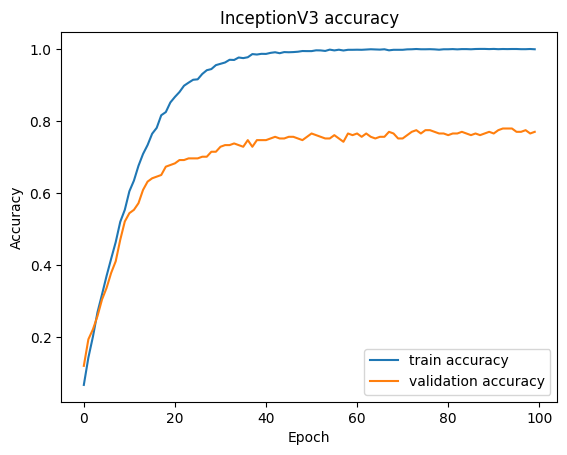

In [11]:
inceptionV3_wrapper.plot_accuracy()

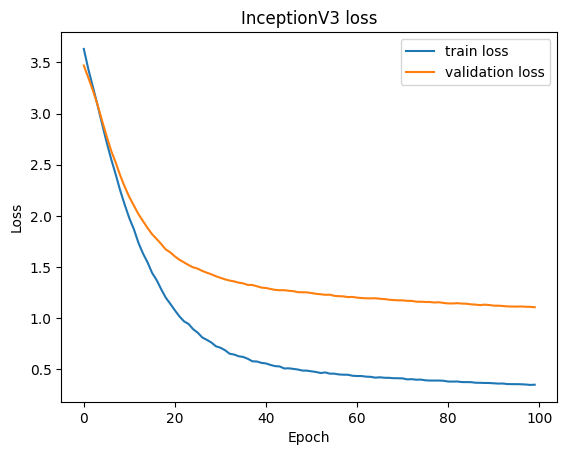

In [12]:
inceptionV3_wrapper.plot_loss()

20/20 [==============================] - 1s 24ms/step - loss: 1.1374 - accuracy: 0.7561
Loss: 1.1374
Accuracy: 0.7561
20/20 [==============================] - 1s 19ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        23
           1       0.79      0.60      0.68        25
           2       0.80      0.83      0.81        52
           3       0.76      0.74      0.75        38
           4       0.72      0.67      0.69        27
           5       0.61      0.89      0.72        35
           6       0.62      0.71      0.66        45
           7       0.75      0.90      0.82        10
           8       0.88      0.58      0.70        12
           9       0.80      0.73      0.76        11
          10       0.71      0.65      0.68        23
          11       0.74      0.88      0.81        26
          12       0.80      0.75      0.77        32
          13       0.71      1.00      0.83     

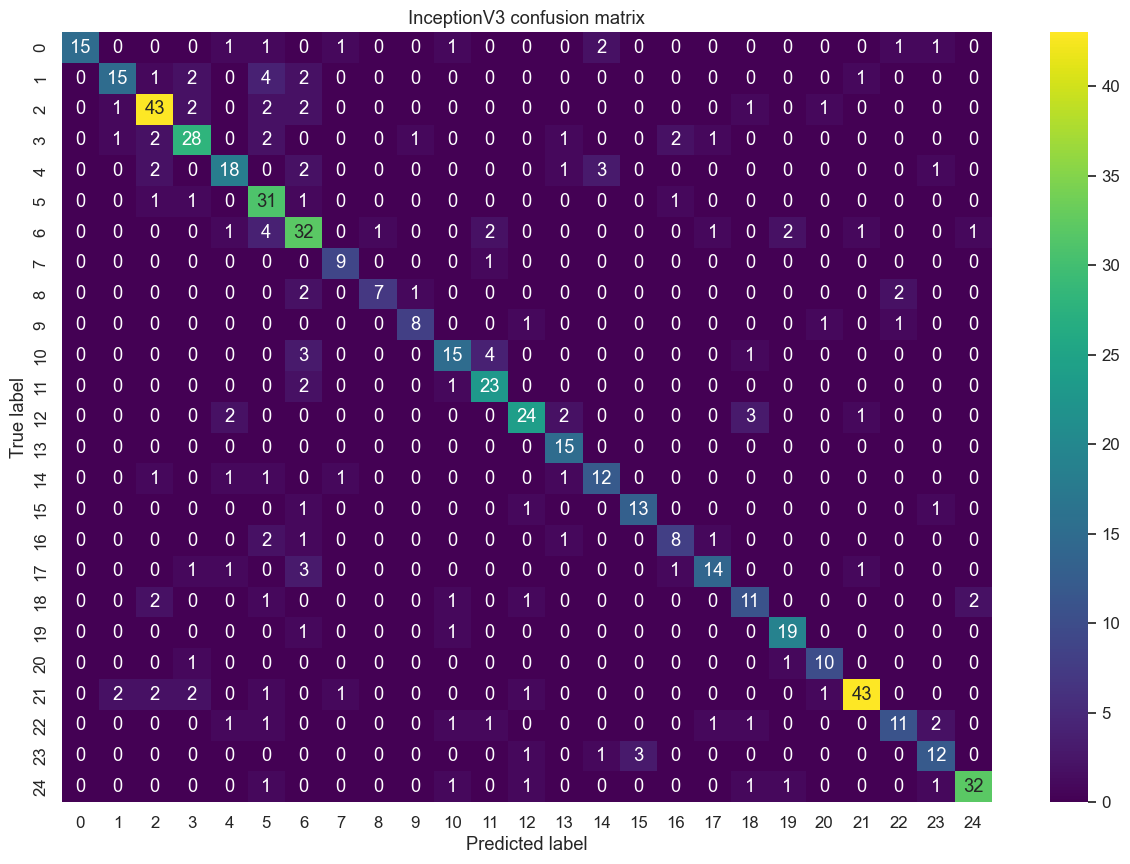

In [13]:
inceptionV3_wrapper.display_evaluation_results()